In [11]:
path = "C:\\Users\\wikto\\OneDrive\\Pulpit\\uczelnia\\sem6\\Licencjat\\github\\hyperparameter-portfolio\\MementoML.csv"
import pandas as pd
from functions import *
import matplotlib.pyplot as plt
file = pd.read_csv(path)

In [12]:
data = []
models = ['gbm', 'glmnet', 'kknn', 'randomForest']
for model in models:
    model_auc = get_mean_metric_dataset(file=file,metric="auc", model=model )
    data.append(model_auc)

In [13]:
best_params = []
models = ['gbm', 'glmnet', 'kknn', 'randomForest']
for model in models:
    dataset = get_mean_metric_dataset(file=file,metric="auc", model=model )
    sums = dataset.groupby('param_index')['auc'].sum().reset_index()
    max_row = sums.loc[sums['auc'].idxmax(), 'param_index']
    best_params.append(max_row)

In [14]:
best_params

[np.int64(1399), np.int64(1171), np.int64(1038), np.int64(1013)]

In [15]:
tunability_df = pd.DataFrame()
for i in range(0, 4):
    dataset = data[i]
    default_aucs = dataset[dataset["param_index"] == best_params[i]]["auc"].reset_index(drop=True)
    
    top_auc_rows = dataset.groupby('dataset', group_keys=False).apply(
        lambda x: x.sort_values('auc', ascending=False).head(1),
    include_groups=False
    )
    best_aucs = top_auc_rows["auc"].reset_index(drop=True)
    model_tunabilities = best_aucs -default_aucs 
    tunability_df[models[i]] = model_tunabilities
tunability_df

,gbm,glmnet,kknn,randomForest
0,0.000045,0.001343,0.000877,8.319609e-05
1,0.012465,0.010382,0.000000,2.164161e-03
2,0.022652,0.000469,0.000000,1.935248e-03
3,0.000575,0.002789,0.000273,5.062197e-05
4,0.000646,0.002850,0.000163,1.358970e-04
5,0.040459,0.000136,0.006020,0.000000e+00
6,0.003563,0.001489,0.000000,5.166870e-04
7,0.000000,0.039880,0.006221,0.000000e+00
8,0.080199,0.001605,0.175347,4.557813e-04
9,0.003973,0.000016,0.003867,1.588590e-03


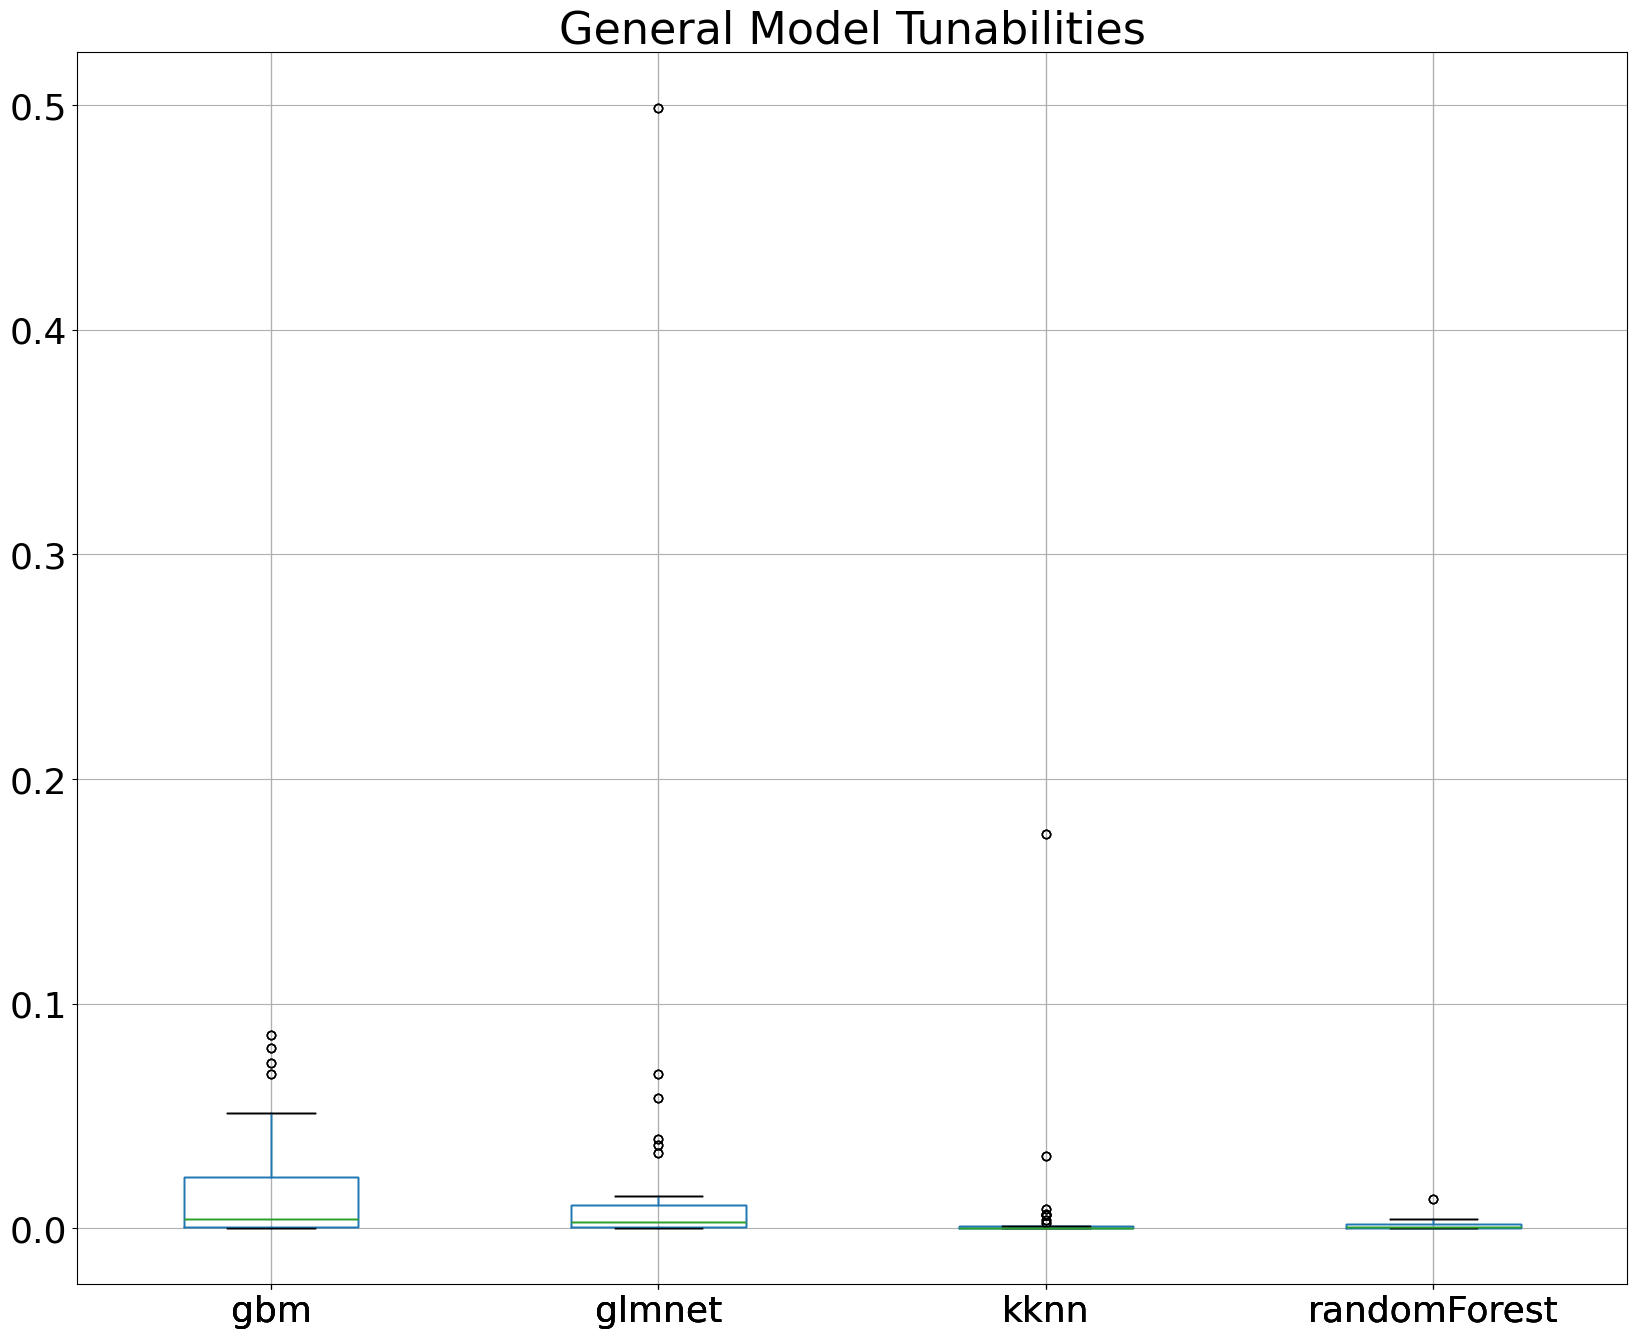

In [16]:
import matplotlib.pyplot as plt
plot = tunability_df.boxplot(figsize=(20, 16), fontsize=26).get_figure()
plt.title("General Model Tunabilities", fontsize=32)
plot